In [1]:
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

ori_csv_data = pd.read_csv(os.path.join('sets', '165818_CKD-origin.csv'), encoding='ISO-8859-1')
print("Data shape (rows, columns) =  ", ori_csv_data.shape)

#print(ori_csv_data.info())
print("Columns: " + str(list(ori_csv_data.columns)))

Data shape (rows, columns) =   (918, 68)
Columns: ['id', 'name', 'gender', 'age', 'height', 'weight', 'diagnosis', 'history', 'etiology', 'remarks', '24hPro', 'SCr', 'BUN', 'Albamin', 'GFR', 'CKD stage', 'dCKD', 'USET', 'rLen', 'rShort', 'rThick', 'rPT', 'rPTLTA', 'rPTLPA', 'rPTLA', 'rPTSA', 'rPTSPA', 'rPSPA', 'Unnamed: 28', 'LE', 'rKME', 'rKUPE', 'rRPE ', 'Unnamed: 33', 'lLen', 'lShort', 'lThick', 'lPT', 'lPTA', 'lPGA', 'lPLA', 'lTSPA', 'lSPA', 'lPSA', 'Unnamed: 44', 'SE', 'lCKE', 'lRUPE', 'lRPE', 'DSK', 'DLK', 'rAR', 'lAR', 'rRP', 'lRP', 'PDT', 'PP', 'PK', 'PL', 'GloNumGM', 'GloNumIM', 'SW', 'SWR', 'Unnamed: 63', 'DSR', 'DLR', 'rRR', 'lRR']


In [2]:
###################################
# data pre-processing
###################################
#step 1: remove non label(dCKD) rows
dat_proc_1 = ori_csv_data[ori_csv_data['dCKD'].notna()]
#print("Data shape (rows, columns) =  ", res_dat_proc_1.shape)

data_labels = dat_proc_1.dCKD.values
print("Global TRUE rate: ", data_labels.sum()/len(data_labels))
print("TRUE count: ", list(dat_proc_1.dCKD).count(1))
print("FALSE count: ", list(dat_proc_1.dCKD).count(0))

#step 2: choose relevant columns
dat_proc_2 = dat_proc_1[[ 'age', 'height', 'weight', 'rLen', 'rShort', 'rPT', 'rPTLPA', 'LE', 'rKME', 'rKUPE', 'rRPE ', 'lPT', 'lPGA', 'lTSPA', 'lSPA', 'lPSA', 'lCKE', 'lRUPE', 'lRPE', 'DSK', 'DLK', 'DSR', 'DLR']]
#dat_proc_2 = dat_proc_1[[ 'age', 'height', 'weight', 'rLen', 'rPT', 'rPTLPA', 'rKME', 'rKUPE', 'rRPE ', 'lPT', 'lPGA', 'lTSPA', 'lPSA', 'lCKE', 'lRUPE', 'lRPE', 'DSK', 'DLK']]
#dat_proc_2 = dat_proc_1[[ 'age', 'height', 'weight', 'rLen', 'rShort', 'rPT', 'rPTLPA', 'LE', 'rKME', 'rKUPE', 'rRPE ', 'lPT', 'lPGA', 'lTSPA', 'lSPA', 'lPSA', 'lCKE', 'lRUPE', 'lRPE', 'DSK', 'DLK']]
#dat_proc_2 = dat_proc_1[[ 'age', 'height', 'weight', 'rLen', 'rShort', 'rPT', 'rPTLPA', 'LE', 'rKME', 'rKUPE', 'rRPE ', 'lPT', 'lPGA', 'lTSPA', 'lSPA', 'lPSA', 'lCKE', 'lRUPE', 'lRPE', 'DSR', 'DLR']]
#print("Data shape (rows, columns) =  ", dat_proc_2.shape)
#print(dat_proc_2.count())

#step3-6: replace illigal data to median 
dat_proc_3 = dat_proc_2.replace('#DIV/0!', 0)
dat_proc_4 = dat_proc_3.fillna(0)
dat_proc_5 = dat_proc_4.astype('float32')
dat_proc_6 = dat_proc_5.replace(0, dat_proc_5.median())
#print(dat_proc_6.head(10))


Global TRUE rate:  0.4623059866962306
TRUE count:  417
FALSE count:  485


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def fun(x, low, high):
    if x < low:
        return low
    elif x > high:
        return high
    else:
        return x
 
for f in list(dat_proc_6.columns):
    mean, std = dat_proc_6[f].mean(), dat_proc_6[f].std(ddof=1)
    low, high = stats.norm.interval(0.9974, loc=mean, scale=std)
    print("min:"+str(dat_proc_6[f].min())+", max:"+str(dat_proc_6[f].max())+", low:"+str(low)+", high:"+str(high))
    dat_proc_6[f]=dat_proc_6[f].apply(lambda x: fun(x,low,high))
    print(str(np.unique(dat_proc_6[f])))
    

min:14.0, max:85.0, low:4.2662673787514365, high:95.80911866861165
[14. 15. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33.
 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51.
 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69.
 70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 84. 85.]
min:3.0, max:196.0, low:130.65917642881055, high:203.74435750673615
[130.65917643 145.         149.         150.         151.
 152.         153.         154.         155.         156.
 157.         158.         159.         160.         161.
 162.         163.         164.         165.         166.
 167.         168.         169.         170.         171.
 172.         173.         174.         175.         176.
 177.         178.         179.         180.         181.
 182.         183.         184.         185.         186.
 187.         190.         193.         196.        ]
min:4.0, max:149.0, low:29.03032780495989, high:114.82443904074304

In [4]:
#step 7: normalization
# max-min normalization
data = (dat_proc_6 - dat_proc_6.min())/(dat_proc_6.max() - dat_proc_6.min())
#print(data.head(10))

# z-score normalization
data1 = (dat_proc_6 - dat_proc_6.mean())/(dat_proc_6.std())  

#print(data1.head(10))
#for f in list(data.columns):
#    print(""+str(f)+":"+str(np.unique(data[f])))

In [5]:
from sklearn.metrics import roc_curve, auc
import matplotlib as mpl  
import matplotlib.pyplot as plt

def plot_roc(labels, predict_prob):
    false_positive_rate,true_positive_rate,thresholds=roc_curve(labels, predict_prob)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    plt.title('ROC')
    plt.plot(false_positive_rate, true_positive_rate,'b',label='AUC = %0.4f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.show()
    

training data shape (rows, columns) =   (811, 23)
TRUE rate:  0.4623921085080148
testing data shape (rows, columns) =   (91, 23)
TRUE rate:  0.46153846153846156
0.7871396895787139
AUC Score (Train): 1.000000


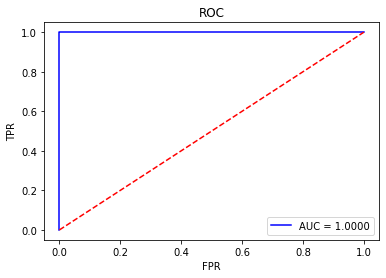

In [17]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pylab as plt
%matplotlib inline

# Split dataset to training and testing dataset
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(data, data_labels, test_size=0.1, random_state=10)
print("training data shape (rows, columns) =  ", train_data.shape)
print("TRUE rate: ", train_labels.sum()/len(train_labels))

print("testing data shape (rows, columns) =  ", test_data.shape)
print("TRUE rate: ", test_labels.sum()/len(test_labels))

X = data #train_data
y = data_labels #train_labels

rf0 = RandomForestClassifier(oob_score=True, random_state=10)
rf0.fit(X,y)
print(rf0.oob_score_)

y_predprob = rf0.predict_proba(X)[:,1]

print("AUC Score (Train): %f" % metrics.roc_auc_score(y,y_predprob))

plot_roc(y, y_predprob)

In [18]:
from sklearn.model_selection import GridSearchCV # old version from sklearn.grid_search import GridSearchCV

#n_estimators
param_test1= {'n_estimators':list(range(30,201,20))}
gsearch1= GridSearchCV(estimator = RandomForestClassifier(min_samples_split=10,
                                 min_samples_leaf=20,max_depth=10,max_features='sqrt' ,random_state=10),
                       param_grid =param_test1, scoring='roc_auc',cv=6, n_jobs=-1)
gsearch1.fit(X,y)
gsearch1.cv_results_,gsearch1.best_params_, gsearch1.best_score_


({'mean_fit_time': array([0.10140816, 0.17489747, 0.23524737, 0.27962967, 0.3379062 ,
         0.39089767, 0.45484332, 0.50610725, 0.5192765 ]),
  'std_fit_time': array([0.00248711, 0.01331979, 0.01596386, 0.02155674, 0.01373363,
         0.00765769, 0.01310699, 0.01624524, 0.04441971]),
  'mean_score_time': array([0.00551454, 0.0131859 , 0.01306148, 0.01612186, 0.01863794,
         0.02357248, 0.02343063, 0.02863097, 0.0248758 ]),
  'std_score_time': array([0.00313605, 0.00199004, 0.00321577, 0.00060035, 0.00644353,
         0.00853596, 0.00780809, 0.00581828, 0.00580064]),
  'param_n_estimators': masked_array(data=[30, 50, 70, 90, 110, 130, 150, 170, 190],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 30},
   {'n_estimators': 50},
   {'n_estimators': 70},
   {'n_estimators': 90},
   {'n_estimators': 110},
   {'n_estimators': 130},
   {'n_esti

In [19]:
#max_depth and min_samples_split
param_test2= {'max_depth':list(range(4,15,2)), 'min_samples_split':list(range(10,61,10))}
gsearch2= GridSearchCV(estimator = RandomForestClassifier(n_estimators=190,min_samples_leaf=20,max_features='sqrt',
                                                          oob_score=True,random_state=10),
                       param_grid = param_test2,scoring='roc_auc',iid=False, cv=10, n_jobs=-1)
gsearch2.fit(X,y)
gsearch2.cv_results_,gsearch2.best_params_, gsearch2.best_score_


({'mean_fit_time': array([0.68878448, 0.65165999, 0.65013795, 0.64828088, 0.65609176,
         0.67327318, 0.69358637, 0.68421485, 0.69358735, 0.68577693,
         0.68577552, 0.6779665 , 0.69983554, 0.69358766, 0.6967088 ,
         0.6967118 , 0.68577807, 0.68421409, 0.69514887, 0.69983375,
         0.69983294, 0.70295932, 0.70452056, 0.83105471, 0.92165716,
         0.92478244, 0.9325913 , 0.94040387, 0.93259459, 0.91697307,
         0.95914946, 0.96227226, 0.97320881, 0.96852238, 0.98153648,
         1.00630946]),
  'std_fit_time': array([0.02063292, 0.0114603 , 0.01076596, 0.01048024, 0.02317154,
         0.0190612 , 0.00765277, 0.01168942, 0.01036265, 0.01093636,
         0.02363941, 0.0103622 , 0.01169148, 0.01036235, 0.00765259,
         0.01249711, 0.00468697, 0.01168915, 0.0104796 , 0.00937088,
         0.00937197, 0.01397209, 0.01093519, 0.0687338 , 0.00698585,
         0.01168965, 0.01000315, 0.01361798, 0.01855001, 0.01000067,
         0.01431527, 0.0124964 , 0.01000237, 0.

0.7871396895787139
AUC Score (Train): 0.926085


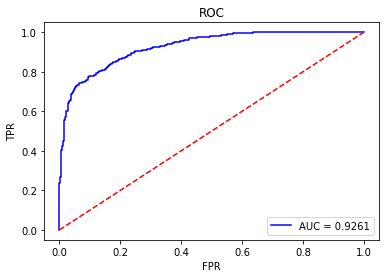

In [20]:
#
rf1= RandomForestClassifier(n_estimators=190, max_depth=10, min_samples_split=10,
                            min_samples_leaf=20, max_features='sqrt' ,oob_score=True,random_state=10)
rf1.fit(data,data_labels)
print(rf1.oob_score_)

y_predprob = rf1.predict_proba(X)[:,1]
print("AUC Score (Train): %f" % metrics.roc_auc_score(y,y_predprob))
plot_roc(y, y_predprob)

In [21]:
#min_samples_split and min_samples_leaf
param_test3= {'min_samples_split':list(range(2,21,2)), 'min_samples_leaf':list(range(10,61,10))}
gsearch3= GridSearchCV(estimator = RandomForestClassifier(n_estimators=190,max_depth=10,
                                                          max_features='sqrt',oob_score=True,random_state=10),
                       param_grid = param_test3,scoring='roc_auc',iid=False, cv=10, n_jobs=-1)
gsearch3.fit(X,y)
gsearch3.cv_results_,gsearch3.best_params_, gsearch3.best_score_


({'mean_fit_time': array([0.80762138, 0.80813584, 0.79389153, 0.79222896, 0.75626042,
         0.75297658, 0.74513645, 0.74201262, 0.73888946, 0.75451145,
         0.69202454, 0.69671142, 0.70139704, 0.69514894, 0.69046259,
         0.70452256, 0.70452201, 0.70295985, 0.71233172, 0.69827375,
         0.66859252, 0.66859283, 0.66546795, 0.66859322, 0.82949271,
         0.88885391, 0.89510312, 0.89666405, 0.89978859, 0.90447495,
         0.8763567 , 0.89197845, 0.90291417, 0.90291278, 0.90447605,
         0.91072354, 0.92478142, 0.93498511, 0.93571663, 0.9497771 ,
         0.96696041, 0.96539538, 0.95758746, 0.95602682, 0.98101974,
         0.96696069, 0.97789404, 0.98726733, 0.98258171, 0.99507766,
         0.97920361, 0.99502552, 0.97755051, 0.97638905, 0.97164598,
         0.97477374, 0.96852062, 1.00601351, 1.01382456, 0.90291295]),
  'std_fit_time': array([0.03660857, 0.05133198, 0.03404907, 0.02242397, 0.01299078,
         0.01952151, 0.01000197, 0.01047775, 0.00715853, 0.01854832,

In [11]:
#max_features:
param_test4= {'max_features':list(range(5,24,2))}
gsearch4= GridSearchCV(estimator = RandomForestClassifier(n_estimators=190,max_depth=10, min_samples_split=2,
                                 min_samples_leaf=10 ,oob_score=True, random_state=10),
   param_grid = param_test4,scoring='roc_auc',iid=False, cv=10, n_jobs=-1)
gsearch4.fit(X,y)
gsearch4.cv_results_,gsearch4.best_params_, gsearch4.best_score_


({'mean_fit_time': array([1.34881256, 1.53550549, 1.73777745, 1.99069562, 1.9728456 ,
         2.19822328, 2.31478152, 2.44318838, 2.62034388, 2.63262293]),
  'std_fit_time': array([0.12616018, 0.05621115, 0.11832201, 0.10788837, 0.04324196,
         0.06496768, 0.06377226, 0.05336909, 0.05648728, 0.14579742]),
  'mean_score_time': array([0.05322256, 0.04908638, 0.05494473, 0.04920943, 0.04572847,
         0.05275605, 0.04759851, 0.04032347, 0.04369247, 0.03757718]),
  'std_score_time': array([0.00892337, 0.00458224, 0.01830039, 0.00870428, 0.00312004,
         0.00933429, 0.00427122, 0.00771628, 0.00462256, 0.01109519]),
  'param_max_features': masked_array(data=[5, 7, 9, 11, 13, 15, 17, 19, 21, 23],
               mask=[False, False, False, False, False, False, False, False,
                     False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_features': 5},
   {'max_features': 7},
   {'max_features': 9},
   {'max_features': 11},
   {'max_featur

0.7971175166297118
AUC Score (Train): 0.966590


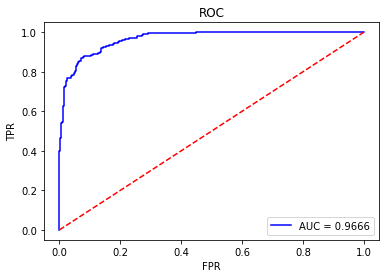

In [14]:
rf2= RandomForestClassifier(n_estimators=190, max_depth=10, min_samples_split=2,
                                 min_samples_leaf=10,max_features=9 ,oob_score=True, random_state=10)
rf2.fit(data,data_labels)
print(rf2.oob_score_)

y_predprob = rf2.predict_proba(X)[:,1]
print("AUC Score (Train): %f" % metrics.roc_auc_score(y,y_predprob))
plot_roc(y, y_predprob)